本文の流れ

- 状態空間モデルの導出
  - 車輪型倒立振子の状態方程式の導出
    + 運動エネルギーの導出
    + ポテンシャルエネルギーの導出
    + 散逸エネルギーの導出
    + Euler-Lagrangeの運動方程式の導出
  - 駆動系の動特性の導出
    + モータの動特性の導出
    + 駆動系の動特性の導出
  - システム全体の状態方程式の導出
  - 観測方程式の導出
  - 線形状態空間モデルの導出
- 制御器の設計
  - システムの可制御性・可観測性の確認
  - 状態フィードバックの設計
  - オブザーバの設計
    - 同一次元オブザーバの設計
    - 外乱オブザーバの設計
    - 外乱カルマンフィルタの設計
  - LQG 制御器の設計
- 実機のシステム同定
  - 倒立振子の幾何パラメータの同定
  - 駆動系の動特性の同定

# 状態空間モデルの導出

## 車輪型倒立振子の状態方程式の導出

Euler-Lagrange の運動方程式を用いて、車輪型倒立振子の状態方程式を導出する。

今回は、車輪型倒立振子の座標系・パラメータを以下の図のように設定する。
また、物理パラメータを以下のように表記する。

- $M_b$：車体の質量
- $M_w$：車輪の質量
- $I_b$：車体の重心周りの慣性モーメント
- $I_w$：車輪の重心周りの慣性モーメント
- $L$：車体の重心から車輪の重心までの距離
- $r$：車輪の半径
- $g$：重力加速度
- $D_{\phi}$：車軸の粘性抵抗

<img src="wheel_inverted_pendulum_overview.jpg">


### 運動エネルギーの導出

運動エネルギー$T$には、車体の運動エネルギー$T_b$と車輪の運動エネルギー$T_w$がある。

さらに、車体の運動エネルギーは車体の重心の並進運動エネルギー$T_{bv}$と車体の回転運動エネルギー$T_{br}$に分けられる。
同様に、車輪も車輪の重心の並進運動エネルギー$T_{wv}$と車輪の回転運動エネルギー$T_{wr}$に分けられる。

まず、並進運動エネルギーについて考える。

車体の重心の座標$(x_b,y_b)$は、

$$
\begin{aligned}
x_b &= r(\theta + \phi) + L \sin \theta \\
y_b &= r + L \cos \theta
\end{aligned}
$$

である。よって、車体の並進運動エネルギー$T_{bv}$は、

$$
\begin{aligned}
T_{bv} &= \frac{1}{2} M_b \left( \dot{x}_b^2 + \dot{y}_b^2 \right) \\
&= \frac{1}{2} M_b \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] + L \dot{\theta} \cos \theta \right)^2 + \left(- L \dot{\theta} \sin \theta \right)^2 \right\}  \\
&= \frac{1}{2} M_b \left\{ r^2 \left[\dot{\theta}+ \dot{\phi}\right]^2 + 2rL\left[\dot{\theta}+ \dot{\phi}\right]\dot{\theta} \cos \theta + L^2 \dot{\theta}^2 \right\}  \\
\end{aligned}
$$

となる。

また、車輪の重心の座標$(x_w,y_w)$は、

$$
\begin{aligned}
x_w &= r (\theta + \phi) \\
y_w &= r
\end{aligned}
$$

である。よって、車輪の並進運動エネルギー$T_{wv}$は、

$$
\begin{aligned}
T_{wv} &= \frac{1}{2} M_w \left( \dot{x}_w^2 + \dot{y}_w^2 \right) \\
&= \frac{1}{2} M_w \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] \right)^2 + 0 \right\}  \\
&=\frac{1}{2} M_w r^2 \left(\dot{\theta}+ \dot{\phi}\right)^2
\end{aligned}
$$

となる。

次に、回転運動エネルギーについて考える。
車体の回転運動エネルギー$T_{br}$は、

$$
T_{br}= \frac{1}{2} I_b \dot{\theta}^2
$$

となる。そして、車輪の回転運動エネルギー$T_{wr}$は、

$$
\begin{aligned}
T_{wr}&= \frac{1}{2} I_w \left(\dot{\phi} + \dot{\theta} \right)^2
\end{aligned}
$$

となる。

以上より、運動エネルギー$T$は、

$$
\begin{aligned}
T &= T_{bv} + T_{wv} + T_{br} + T_{wr} \\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta
\end{aligned}
$$

となる。


### ポテンシャルエネルギーの導出

車体の位置エネルギー$U_b$、車輪の位置エネルギーは、それぞれ

$$
\begin{aligned}
U_b &= M_b g L \cos \theta \\
U_w &= 0
\end{aligned}
$$

である。よって、ポテンシャルエネルギー$U$は、

$$
\begin{aligned}
U &= U_b + U_w \\
&= M_b g L \cos \theta
\end{aligned}
$$

である。


### 散逸エネルギーの導出

車軸間の摩擦によってエネルギー損失が生じると仮定する。このとき、散逸エネルギー$F$は、

$$
F = \frac{1}{2} D_{\phi} \dot{\phi}^2
$$

となる。


### Euler-Lagrange の運動方程式の導出

ラグランジアン$L$は、

$$
\begin{aligned}
L &= T - U\\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta- g L M_b  \cos \theta
\end{aligned}
$$

となる。一般化座標$q$、一般化力$\tau$に対する Euler-Lagrange の運動方程式は、

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) - \frac{\partial L}{\partial q} + \frac{\partial F}{\partial \dot{q}} = \tau
$$

である。$\theta, \phi$に対する Euler-Lagrange の運動方程式は、

$$
\begin{aligned}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} + \frac{\partial F}{\partial \dot{\theta}} &= \tau_\theta\\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\phi}} \right) - \frac{\partial L}{\partial \phi} + \frac{\partial F}{\partial \dot{\phi}} &= \tau_\phi
\end{aligned}
$$

である。ここで、$\tau_\theta, \tau_\phi$はそれぞれ、$\theta,\phi$座標系に加わる一般化力である。
まず$\theta$の運動方程式を計算する。

$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\theta}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) + \left[I_b + L^2M_b\right]\dot{\theta} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\\
&= \left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta \\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} &= \frac{d}{dt}\left\{\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\right\} \\
&=\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \dot{\theta}\sin \theta\\
\frac{\partial L}{\partial \theta} &= -rL M_b \dot{\theta}^2 \sin \theta  - rLM_b \dot{\phi}\dot{\theta}  \sin \theta + g L M_b  \sin \theta \\
\frac{\partial F}{\partial \dot{\theta}} &= 0 \\
\end{aligned}
$$

である。よって、$\theta$の運動方程式は、

$$
\begin{aligned}
&\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(\bcancel{2}\dot{\theta} + \cancel{\dot{\phi}}\right) \dot{\theta}\sin \theta \\
&\quad +  \bcancel{rLM_b \dot{\theta}^2 \sin \theta} + \cancel{rLM_b  \dot{\phi}\dot{\theta}\sin \theta } -g L M_b  \sin \theta = \tau_\theta\\
\therefore &\left[I_b + L^2M_b +I_w + r^2\left(M_b + M_w\right) + 2r LM_b \cos \theta \right]\ddot{\theta} \\
&\quad+ \left[I_w + r^2\left(M_b + M_w\right) + rL M_b\cos \theta \right]\ddot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta - g L M_b  \sin \theta = \tau_\theta \\
\end{aligned}
$$

となる。次に$\phi$の運動方程式を計算する。

$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\phi}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) +r L  M_b  \dot{\theta} \cos \theta\\
&= \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi}} &= \frac{d}{dt}\left\{\left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\right\} \\
&=\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta\\
\frac{\partial L}{\partial \phi} &= 0 \\
\frac{\partial F}{\partial \dot{\phi}} &= D_{\phi} \dot{\phi} \\
\end{aligned}
$$

である。よって、$\phi$の運動方程式は、

$$
\begin{aligned}
&\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta  + D_{\phi} \dot{\phi} = \tau_\phi \\
\therefore &\left[I_w + r^2\left(M_b + M_w\right) + rL M_b \cos \theta \right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right) \right]\ddot{\phi} + D_{\phi} \dot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta = \tau_\phi \\
\end{aligned}
$$

となる。ここで、方程式の定数をまとめるため、

$$
\begin{aligned}
a &= I_w + r^2\left(M_b + M_w\right) \\
b &= I_b + L^2M_b \\
c &= r L M_b \\
d &= gL M_b \\
\end{aligned}
$$

とおくと、$\theta,\phi$の運動方程式はそれぞれ、

$$
\begin{aligned}
\left(a + b + 2c\cos \theta \right)\ddot{\theta} + \left(a + c\cos \theta \right)\ddot{\phi} - c \dot{\theta}^2 \sin \theta - d \sin \theta &= \tau_\theta \\
\left(a + c\cos \theta \right)\ddot{\theta} + a\ddot{\phi} + D_{\phi} \dot{\phi} - c \dot{\theta}^2 \sin \theta &= \tau_\phi \\
\end{aligned}
$$

となる。この連立の運動方程式をシミュレーションに適するように、$\bm{x}=\begin{bmatrix}\theta & \phi & \dot{\theta} & \dot{\phi}\end{bmatrix}^\top$、$\bm{u}=\begin{bmatrix}\tau_\theta & \tau_\phi \end{bmatrix}^\top$とおいて、

$$
\begin{aligned}
\dot{\bm{x}} &= \bm{f}(\bm{x},\bm{u}) = \begin{bmatrix} f_1(\bm{x},\bm{u}) \\ f_2(\bm{x},\bm{u}) \\ f_3(\bm{x},\bm{u})\\ f_4(\bm{x},\bm{u})\end{bmatrix} \\
\end{aligned}
$$

の形になるように変形する。すると、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} = \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$

となる。

ここで、各運動方程式の一般化力を求める。
一般化力の定義より、一般化力のする仕事$W$の変分$\delta W$は、

$$
\delta W = \tau_\theta \delta \theta + \tau_\phi \delta \phi
$$

と書ける。
今回、系に加わる外力として、

- 車輪を駆動するトルク$\tau$
- 車体の車輪からの距離$l$の位置に x 軸方向に加わる外乱$f_d$

を考える。すると、これらが行う仕事の変分は、

$$
\delta W = \tau \delta \phi + f_d \delta x_b
$$

となる。ここで、$\delta x_b$は x 軸方向の仮想変分である。特に、

$$
\begin{aligned}
\delta x_b &= \delta \left\{r(\theta + \phi) + l \sin \theta \right\} \\
&= r \delta \theta + r \delta \phi + l \cos \theta \delta \theta
\end{aligned}
$$

なので、

$$
\begin{aligned}
\delta W &= \tau \delta \phi + f_d \left(r \delta \theta + r \delta \phi + l \cos \theta \delta \theta\right) \\
&= (\tau + f_d r) \delta \phi + \left[f_d (r +  l \cos \theta)\right] \delta \theta
\end{aligned}
$$

となる。よって、係数比較により、

$$
\begin{aligned}
\tau_\theta &= f_d (r +  l \cos \theta) \\
\tau_\phi &= \tau + f_d r
\end{aligned}
$$

となる。


## 駆動系の動特性の導出


### モーターの動特性の導出

モーターの内部は以下のようにモデル化できる。

$$
\begin{aligned}
v &= R_M i  + L \frac{di}{dt} + K_e \dot{\phi}_M  \\
\tau_M &= K_T i
\end{aligned}
$$

今回、$L_M \ll R_M$ を踏まえてインダクタンスを無視する。
すると、モータによって生じるトルク$\tau_M$は、

$$
\begin{aligned}
\tau_M &= K_T i \\
&= \frac{K_T}{R_M} (v -  K_e \dot{\phi}_M )\\
\end{aligned}
$$

となる。
ここで、モーターで$R_M$以外でのエネルギー損失がないとすると、

$$
\begin{aligned}
\tau_M \dot{\phi}_M &= e i\\
K_T i \dot{\phi}_M&= K_e \dot{\phi}_M i \\
\therefore K_T &= K_e \\
\end{aligned}
$$

となる。したがって、$K=K_e=K_T$として、モータによって生じるトルク$\tau_M$は、

$$
\tau_M = \frac{K}{R_M} (v -  K \dot{\phi}_M)
$$

となる。


### 駆動系の動特性の導出

実際の駆動系は以下の図のようになっている。

ここで、$J_M$はモーター側からみたモーター・ギヤを合わせた慣性モーメントであり、$n$は入出力間の減速比$\omega_{\mathrm{in}}/\omega_{\mathrm{out}}=n$である。

このとき駆動系の角運動方程式は、
$$
\begin{aligned}
J_M \ddot{\phi}_M &= \tau_M - \frac{\tau}{n}\\
\end{aligned}
$$

となる。
ここで、駆動系は倒立振子本体に取り付けられるため、本来ギヤを回すことによっても本体が回るような反作用を受けるはずである。
しかし、ギヤを多段にするため、これらの反作用は互いに打ち消し合い弱められると考えられる。そこで、ここではそのような反作用は無視している。

前節の結果を踏まえ、$\phi_M = n\phi$に注意すると、モーターに電圧$v$を印加したときにタイヤに生じるトルク$\tau$は、

$$
\begin{aligned}
\tau &= n\left(\tau_M - J_M \ddot{\phi}_M\right) \\
&= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$

となる。


## システム全体の状態方程式の導出


以上の結果を再掲すると、システム全体の状態方程式は、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &= \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\tau_\theta &= f_d (r +  l \cos \theta) \\
\tau_\phi &= \tau + f_d r \\
\tau &= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$

なる。これらを整理すると、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &= \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab + n^2 J_M(a+b+2c\cos \theta)- c^2 \cos^2 \theta }\begin{bmatrix} a+n^2 J_M & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix} f_d (r +  l \cos \theta)+  (c \dot{\theta}^2 + d)\sin \theta \\ f_d r +\frac{nK}{R_M} v + c \dot{\theta}^2\sin \theta - \left(D_\phi + \frac{n^2K^2}{R_M}  \right) \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$
となる。

## 観測方程式の導出

観測できる情報は、車体の角速度$\dot{\theta}$（and 設定によっては車輪の角度$\phi$）である。このときの観測方程式は、

$$
\begin{aligned}
\bm{y} &= \begin{bmatrix}0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix} \\
 & \left(=\begin{bmatrix}0 & 1 &0 &0 \\ 0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix}  \right)\\
\end{aligned}
$$

となる。


## 線形状態空間モデルの導出


### 状態方程式の線形化

$|\theta| \ll 1$として、$\sin \theta \approx \theta,\; \cos \theta \approx 1$と近似し、
微小量$\theta,\; \dot{\theta}$の 2 次以上の項を無視することで状態方程式を線形化する。
上記の近似により、状態方程式は、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab +n^2J_M(a + b + 2c)- c^2  }\begin{bmatrix} a+n^2J_M & -(a + c) \\  -(a + c) & a + b + 2c \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ \frac{nK}{R_M} v +f_dr - ( D_\phi + \frac{n^2K^2}{R_M} ) \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$

となる。ここで、定数をまとめるため、

$$
\begin{aligned}
E &= a + n^2 J_M \\
F &= a + c \\
G &= a + b + 2c \\
H &= D_\phi + \frac{n^2K^2}{R_M} \\
I &= \frac{nK}{R_M} \\
\Delta &= EG - F^2= ab +n^2J_M(a + b + 2c)- c^2 \\
\end{aligned}
$$

とおくと、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\Delta^{-1}\begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} \end{bmatrix}\\
\end{aligned}
$$

となる。上記を標準的な状態方程式の表現に変形していく。

$$
\begin{aligned}
   \begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} &= 
   \begin{bmatrix} d\theta \\ -H \dot{\phi}\end{bmatrix} + 
   \begin{bmatrix}(r+l)f_d \\ Iv + rf_d \end{bmatrix}\\
   &= \begin{bmatrix} d & 0 & 0 & 0 \\ 0 & 0 & 0 &-H\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      + \begin{bmatrix} 0 & r+l  \\ I & r\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix}
\end{aligned}
$$
である。したがって、
$$
\begin{aligned}
\begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} 
   &= 
      \begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix} d & 0 & 0 & 0 \\ 0 & 0 & 0 &-H\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      +
      \begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix} 0 & r+l  \\ I & r\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix} \\
   &= \begin{bmatrix} Ed & 0 & 0 & FH \\ -Fd & 0 & 0 & -GH\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      +
      \begin{bmatrix} -FI & E(r+l)-Fr \\ GI & -F(r+l)+Gr\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix}

\end{aligned}
$$
となる。よって、これを前述の状態空間表現に代入して整理すれば、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\Delta^{-1}\begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} \end{bmatrix}\\
&=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\Delta^{-1}\begin{bmatrix} Ed & 0 & 0 & FH \\ -Fd & 0 & 0 & -GH\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      +
      \Delta^{-1}\begin{bmatrix} -FI & E(r+l)-Fr \\ GI & -F(r+l)+Gr\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix} \end{bmatrix}\\
 &=
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\Delta^{-1}Ed & 0 & 0 & \Delta^{-1}FH \\
-\Delta^{-1}Fd & 0 & 0 & -\Delta^{-1}GH
\end{bmatrix}
\begin{bmatrix}
\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\
0 & 0 \\
-\Delta^{-1}FI  & \Delta^{-1}\left(E(r + l)-Fr\right) \\
\Delta^{-1}GI  & \Delta^{-1}\left(-F(r+l)+Gr\right) \\
\end{bmatrix}
\begin{bmatrix}
v \\ f_d
\end{bmatrix}
\end{aligned}
$$
となる。

ここで、状態$\bm{x}=\begin{bmatrix}\theta & \phi & \dot{\theta} & \dot{\phi}\end{bmatrix}^\top$、入力$\bm{u}=\begin{bmatrix} v & f_d \end{bmatrix}^\top$、出力$\bm{y}=\begin{bmatrix} \dot{\theta} \end{bmatrix}^\top \; \left(\text{または}=\begin{bmatrix} \phi & \dot{\theta}\end{bmatrix}^\top \right)$とおき、

$$
\begin{aligned}
A&=\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\Delta^{-1}Ed & 0 & 0 & \Delta^{-1}FH \\
-\Delta^{-1}Fd & 0 & 0 & -\Delta^{-1}GH
\end{bmatrix} \\
B&=\begin{bmatrix}
0 & 0 \\
0 & 0 \\
-\Delta^{-1}FI  & \Delta^{-1}\left(E(r + l)-Fr\right) \\
\Delta^{-1}GI  & \Delta^{-1}\left(-F(r+l)+Gr\right) \\
\end{bmatrix} \\
C&=\begin{bmatrix}0 & 0 &1 &0\end{bmatrix}\left(\text{または}=\begin{bmatrix}0 & 1 &0 &0 \\ 0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix}  \right)\\\\
\end{aligned}
$$
とおく。

以上により、線形化された状態空間モデルは、
$$
\begin{aligned}
\bm{\dot{x}}&=A\bm{x}+B\bm{u} \\
\bm{y}&=C\bm{x}
\end{aligned}
$$
となる。

### シミュレーション

以上の導出結果の正当性を確認するために、シミュレーションを行う。


In [1]:
import numpy as np
import sympy as sp
import scipy as sc
import scipy.constants as const 
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML

from typing import List, Tuple, Dict, Callable, Union

In [2]:
class MotoredWheelInvertedPendulumSimulator:
    """
    モーター駆動形の車輪型倒立振子のシミュレータ
    """

    def __init__(
        self,
        M_b: float,
        M_w: float,
        I_b: float,
        I_w: float,
        L: float,
        r: float,
        D_phi: float,
        l: float,
        n: float,
        J_M: float,
        K: float,
        R_M: float,
        theta_init: float = 0.0,
        dtheta_init: float = 0.0,
        phi_init: float = 0.0,
        dphi_init: float = 0.0,
    ):
        # 倒立振子本体のパラメータ
        self.M_b = M_b
        self.M_w = M_w
        self.I_b = I_b
        self.I_w = I_w
        self.L = L
        self.r = r
        self.D_phi = D_phi
        
        # モータのパラメータ
        self.l = l
        self.n = n
        self.J_M = J_M
        self.K = K
        self.R_M = R_M
        
        # 初期値の設定
        self.theta = theta_init
        self.dtheta = dtheta_init
        self.phi = phi_init
        self.dphi = dphi_init
        
        # 外力の作用点
        self.l = l

        # 定数の計算
        self.a = I_w + r**2 * (M_b + M_w)
        self.b = I_b + L**2 * M_b
        self.c = r * L * M_b
        self.d = const.g * L * M_b
        
        #時間のリセット
        self.t = 0.0

    def reset(
        self,
        theta_init: float = 0.0,
        phi_init: float = 0.0,
        dtheta_init: float = 0.0,
        dphi_init: float = 0.0,
    ) -> None:
        """
        姿勢の初期化

        Parameters
        ----------
        theta_init : float, optional
            車体の姿勢, by default 0.0
        phi_init : float, optional
            タイヤの車体からの回転角度, by default 0.0
        dtheta_init : float, optional
            車体の姿勢の時間微分, by default 0.0
        dphi_init : float, optional
            タイヤの車体からの回転角度の時間微分, by default 0.0
        """
        self.theta = theta_init
        self.dtheta = dtheta_init
        self.phi = phi_init
        self.dphi = dphi_init
        self.t = 0.0

    def dynamics_nonlinear(
        self,
        t: float,
        x_vec: np.ndarray,
        v_func: Callable[[float, np.ndarray], float] = None,
        f_d_func: Callable[[float, np.ndarray], float] = None,
    ) -> np.ndarray:
        if v_func is None:
            v_func = lambda t, x: 0.0
        if f_d_func is None:
            f_d_func = lambda t, x: 0.0

        theta = x_vec[0]
        phi = x_vec[1]
        dtheta = x_vec[2]
        dphi = x_vec[3]

        v = v_func(t, x_vec)
        f_d = f_d_func(t, x_vec)

        E = self.a +self.n**2 *self.J_M
        F = self.a +self.c * np.cos(theta)
        G = self.a + self.b + 2 * self.c * np.cos(theta)
        H = self.D_phi + self.n**2 * self.K**2 /self.R_M
        I = self.n * self.K / self.R_M

        A = np.array(
            [[E, -F],
             [-F, G]]
        )
        A /= E * G - F **2
        b = np.zeros(2)
        b[0] = f_d * (self.r + self.l * np.cos(theta)) + (self.c * dtheta**2 + self.d) * np.sin(theta)
        b[1] = f_d * self.r + I * v + self.c * dtheta**2 * np.sin(theta) - H * dphi

        func = np.zeros(4)
        func[0] = dtheta
        func[1] = dphi
        func[2:4, None] = A @ b[:, None]

        return func

    def step(
        self, v: float = 0.0, f_d: float = 0.0, dt: float = 0.01
    ) -> np.ndarray:
        """
        時間を進める

        Parameters
        ----------
        v : float, optional
              モーターに加える電圧, by default 0.0
        f_d : float, optional
              車体に加える力, by default 0.0
        dt : float, optional
              時間の刻み幅, by default 0.01

        Returns
        -------
        np.ndarray
              状態ベクトル
        """
        v_func = lambda t, x: v
        f_d_func = lambda t, x: f_d

        x_vec = np.array([self.theta, self.phi, self.dtheta, self.dphi])
        k1 = self.dynamics_nonlinear(self.t, x_vec, v_func, f_d_func)
        k2 = self.dynamics_nonlinear(self.t+dt/2, x_vec + dt / 2 * k1, v_func, f_d_func)
        k3 = self.dynamics_nonlinear(self.t+dt/2, x_vec + dt / 2 * k2, v_func, f_d_func)
        k4 = self.dynamics_nonlinear(self.t + dt, x_vec + dt * k3, v_func, f_d_func)

        x_vec += dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        self.t += dt

        self.theta = x_vec[0]
        self.phi = x_vec[1]
        self.dtheta = x_vec[2]
        self.dphi = x_vec[3]

        return x_vec
    
    def calc_linear_state_space(self):
        E = self.a +self.n**2 *self.J_M
        F = self.a +self.c
        G = self.a + self.b + 2 * self.c
        H = self.D_phi + self.n**2 * self.K**2 /self.R_M
        I = self.n * self.K / self.R_M
        del_inv = 1 / (E * G - F * F)

        A = np.array(
            [
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [del_inv * E * self.d, 0, 0, del_inv * F * H],
                [-del_inv * F * self.d, 0, 0, -del_inv * G * H],
            ]
        )
        B = np.array([[0], [0], [-del_inv * F * I], [del_inv * G * I]])
        # C = np.array([[0, 0, 1, 0]])  # タイヤ角度が取得できない場合
        C = np.array([[0,1,0,0],[0,0,1,0]]) # タイヤ角度が取得できる場合
        return A, B, C

#### パラメータの設定

In [3]:
# 車体
M_b = 0.28
L = 0.15
I_b = M_b * L**2 / 3
# 車輪
M_w = 0.1
r = 0.03
I_w = M_w * r**2 / 2
D_phi = 2.0e-7
# 外乱力点
l = 2 * L

# モータ
n = 10
K = 2.3e-2
J_M = 1.5e-6
R_M = 8.3

# シミュレータの作成
pendulum_simulator = MotoredWheelInvertedPendulumSimulator(
      M_b, M_w, I_b, I_w, L, r, D_phi, l, n, J_M, K, R_M
)


#### シミュレーションの実行

In [4]:
# 10秒間動かすシミュレーションを実行
t_end = 10
dt = 0.01
t_points = np.arange(0, t_end, dt)

#初期条件の設定：30度傾け、位置を0.5mずらした状態から開始
theta_init = np.radians(30)
x_est_init = 0.5
phi_init = x_est_init / r - theta_init


#常微分方程式を解く

# scipyの関数を使う場合
free_dynamics_func = lambda t, x: pendulum_simulator.dynamics_nonlinear(t, x) #電圧・外乱は0
x_est_init = np.array([theta_init, phi_init, 0, 0])
sol = solve_ivp(free_dynamics_func, [0, t_end], x_est_init, t_eval=t_points)
# 解いた結果を取り出す
theta_hist = sol.y[0].T
phi_hist = sol.y[1].T
dtheta_hist = sol.y[2].T
dphi_hist = sol.y[3].T

# #自分でルンゲクッタ法を実装する場合
# pendulum.reset(theta_init, phi_init,0, 0)
# x_hist = []
# for t in t_points:
#    x = pendulum.step(0, 0, dt)
#    x_hist.append(x) 

# x_hist = np.array(x_hist)

# # 解いた結果を取り出す
# theta_hist = x_hist[:, 0]
# phi_hist = x_hist[:, 1]
# dtheta_hist = x_hist[:, 2]
# dphi_hist = x_hist[:, 3]



x_hist = r * (theta_hist + phi_hist)
v_hist = r * (dtheta_hist + dphi_hist)

#### シミュレーション結果の描画

In [5]:
#ヘルパー関数の定義
# 時系列データ描画用関数
def configure_axes(
    axis,
    x_data,
    y_data_label_list,
    y_label,
    y_axis_outer=0.2,
    legend_loc="upper right",
):
    y_min, y_max = np.inf, -np.inf
    for element in y_data_label_list:
        y_data, label = element[0], element[1]
        if len(element) > 2:
            axis.plot(x_data, y_data, label=label, **element[2])
        else:
            axis.plot(x_data, y_data, label=label)
        y_min = min(y_min, np.min(y_data))
        y_max = max(y_max, np.max(y_data))

    y_range = y_max - y_min
    axis.set_ylim(
        y_min - y_range * y_axis_outer, y_max + y_range * y_axis_outer
    )
    axis.set_ylabel(y_label)
    axis.legend(loc=legend_loc)
    axis.grid()


def plot_time_domain(subtitle, _t, data_list, labels):
    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(len(data_list), 1, figsize=(9, 12))
    fig.patch.set_facecolor("lavender")
    fig.suptitle(subtitle)

    for i, (y_data_label_list, label) in enumerate(zip(data_list, labels)):
        configure_axes(ax[i], _t, y_data_label_list, label)

    fig.tight_layout()
    

def set_axis_properties(
    ax, x_range, y_range, xlabel, ylabel, title, grid=True
):
    """Set common properties for an axis."""
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(grid)

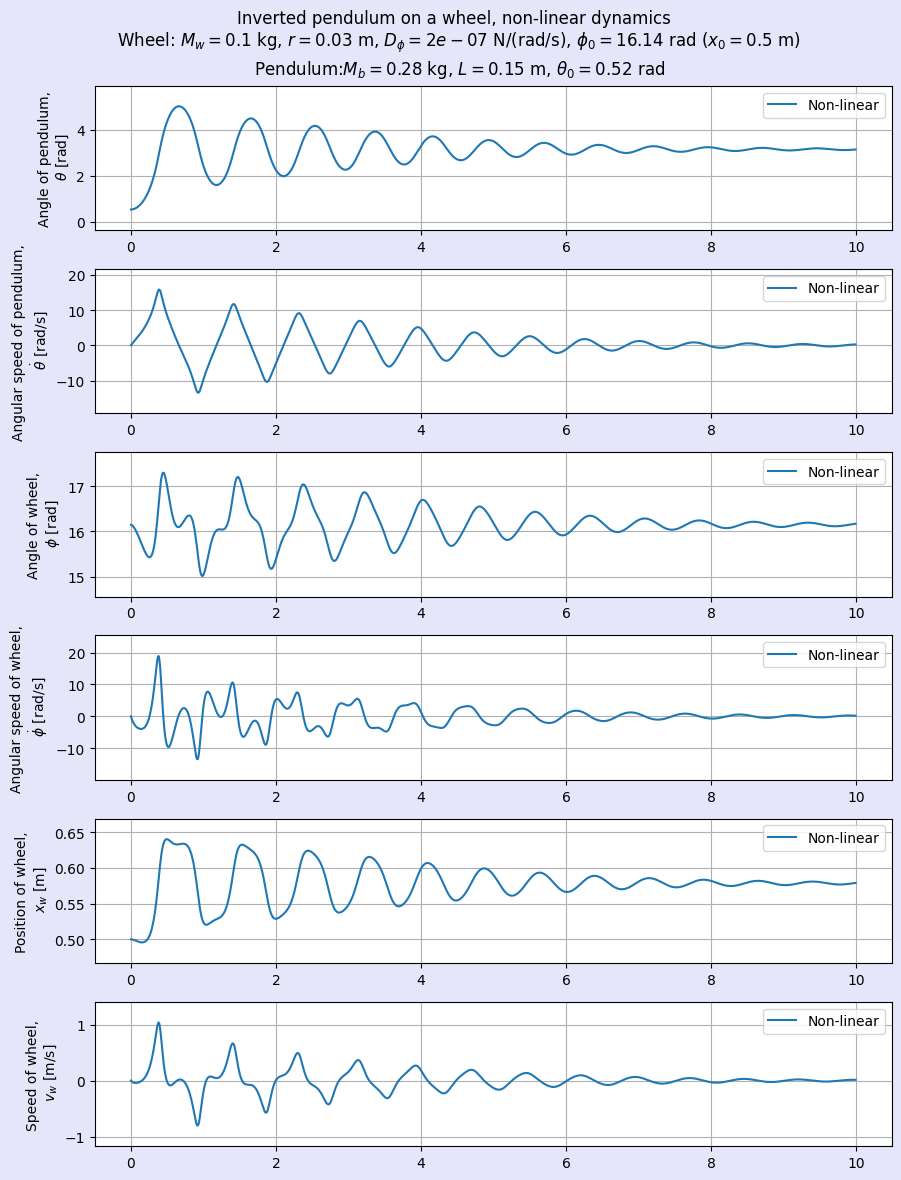

In [6]:
# グラフを描画
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"


data_list = [
    [(theta_hist, "Non-linear")],
    [(dtheta_hist, "Non-linear")],
    [(phi_hist, "Non-linear")],
    [(dphi_hist, "Non-linear")],
    [(x_hist, "Non-linear")],
    [(v_hist, "Non-linear")]
]
labels_list = [
    "Angle of pendulum,\n $\\theta$ [rad]",
    "Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]",
    "Angle of wheel,\n $\\phi$ [rad]",
    "Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]",
    "Position of wheel,\n $x_{w}$ [m]",
    "Speed of wheel,\n $v_{w}$ [m/s]",
]

plot_time_domain(subtitle, t_points, data_list, labels_list)

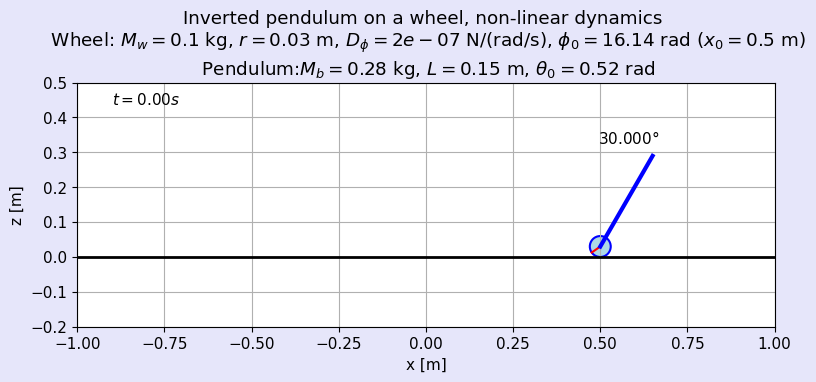

In [7]:
# アニメーションを描画

# カラーマップ
cmap = plt.get_cmap("tab10")

# プロット
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
fig.patch.set_facecolor("lavender")

ax.set_aspect("equal")

# グラフのプロパティの設定
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"

plot_scale = 1

set_axis_properties(ax,[-plot_scale, plot_scale], [-plot_scale/5, plot_scale/2], "x [m]", "z [m]", subtitle, grid=True)


# アニメーションレンダリング
def initialize_pendulum_animation(ax):
    # 時刻表示
    text_time = ax.text(
        -plot_scale + 0.1,
        plot_scale / 2 - plot_scale / 20,
        f"$t = {t_points[0]:.2f} s$",
        va="center",
    )

    # 床描画
    ax.plot([-10, 10], [0, 0], lw=2, color="black")

    # 車輪描画
    wheel = patches.Circle(xy=(x_hist[0], r), radius=r, lw=1.5, ec="blue", fc="lightblue")
    ax.add_patch(wheel)

    #　車輪角度マーカー（車輪の回転角度を把握するための線分）を車輪に描画
    (line_angle,) = ax.plot(
    [x_hist[0], x_hist[0] + r * np.sin(theta_hist[0] + phi_hist[0])],
    [r, r + r * np.cos(theta_hist[0] + phi_hist[0])],
    lw=1.5,
    c="red",
    )

    # 車体描画
    (pendulum,) = ax.plot(
    [x_hist[0], x_hist[0] + 2 * L * np.sin(theta_hist[0])],
    [r, r + 2 * L * np.cos(theta_hist[0])],
    lw=3,
    color="blue",
    )

    # 車体の傾斜角度描画
    text_angle = ax.text(
        x_hist[0] + 1.1 * L * np.sin(theta_hist[0]),
        r + 2 * L * 1.1 * np.cos(theta_hist[0]),
        f"${np.degrees(theta_hist[0]):.3f}\degree$",
        ha="center",
        va="bottom",
    )
    return wheel, line_angle, pendulum, text_time, text_angle

wheel, line_angle, pendulum, text_time, text_angle = initialize_pendulum_animation(ax)

In [8]:
# フレーム更新関数
def update_pendulum_frame(i, wheel, line_angle, pendulum, text_angle, text_time):
   # 車輪
   wheel.center = (x_hist[i], r)
   
   # 車輪角度マーカー
   line_angle.set_data(
         [x_hist[i], x_hist[i] + r * np.sin(theta_hist[i] + phi_hist[i])],
         [r, r + r * np.cos(theta_hist[i] + phi_hist[i])],
   )
   # 車体
   pendulum.set_data(
         [x_hist[i], x_hist[i] + 2 * L * np.sin(theta_hist[i])],
         [r, r + 2 * L * np.cos(theta_hist[i])],
   )
   
   # 車体の傾斜角度描画
   text_angle.set_position(
         (x_hist[i] + 1.1 * L * np.sin(theta_hist[i]), r + 2 * L * 1.1 * np.cos(theta_hist[i]))
   )
   text_angle.set_text(f"${np.degrees(theta_hist[i]):.3f}\degree$")
   
   # 時刻表示
   text_time.set_text(f"$t = {t_points[i]:.2f} s$")
   
   return (
        wheel,
        line_angle,
        pendulum,
        text_angle,
        text_time
    )

In [9]:
# アニメーションの作成

ani = animation.FuncAnimation(
    fig,
    lambda i: update_pendulum_frame(i, wheel, line_angle, pendulum, text_angle, text_time),
    frames=np.arange(0, len(t_points), 5),
    interval=dt * 5 * 1000,
    blit=True,
)

# アニメーションの表示
HTML(ani.to_html5_video())

In [10]:
# アニメーションの保存
file = "free_pendulum.gif"
ani.save(file)

# 制御器(LQG)の設計


## システムの可制御性・可観測性の確認

線形化したシステムの可制御性・可観測性を確認する。
以下で、可制御性行列・可観測性行列をそれぞれ求めると、

- タイヤ角度$\phi$が取得できない場合：可制御・非可観測
- タイヤ角度$\phi$が取得できる場合：可制御・可観測

となる。
また、タイヤ角度$\phi$を上の状態空間表現から除くと、タイヤ角度$\phi$が取得できない場合でも可観測になる。


In [10]:
A,B,C = pendulum_simulator.calc_linear_state_space()

# 可制御性行列
U_c = np.hstack([B, A @ B, A @ A @ B, A @ A @ A @ B])
print("rank U_c:", np.linalg.matrix_rank(U_c))

# 可観測性行列
U_o = np.vstack([C, C @ A, C @ A @ A, C @ A @ A @ A])
print("rank U_o:", np.linalg.matrix_rank(U_o))

# タイヤ角度をダイナミクスから除いた場合
A_wo_phi = A[[0,2,3],:]
A_wo_phi = A_wo_phi[:,[0,2,3]]
B_wo_phi = B[[0,2,3],]
C_wo_phi = C[:,[0,2,3]]

# print("A_wo_phi:", A_wo_phi)
# print("B_wo_phi:", B_wo_phi)
# print("C_wo_phi:", C_wo_phi)


# 可制御性行列
U_c_wo_phi = np.hstack([B_wo_phi, A_wo_phi @ B_wo_phi, A_wo_phi @ A_wo_phi @ B_wo_phi])
print("rank U_c_wo_phi:", np.linalg.matrix_rank(U_c_wo_phi))
# 可観測性行列
U_o_wo_phi = np.vstack([C_wo_phi, C_wo_phi @ A_wo_phi, C_wo_phi @ A_wo_phi @ A_wo_phi])
print("rank U_o_wo_phi:", np.linalg.matrix_rank(U_o_wo_phi))

rank U_c: 4
rank U_o: 4
rank U_c_wo_phi: 3
rank U_o_wo_phi: 3


## 状態フィードバックの設計
以下の状態空間モデルに従う可制御・可観測なシステムを考える。
$$
\begin{aligned}
\bm{\dot{x}} &= A\bm{x} + B\bm{u} \\
\bm{y} &= C\bm{x}
\end{aligned}
$$
上記のシステムにおいて、評価関数
$$
J = \int_{0}^{\infty} \bm{x}^\top Q \bm{x} + \bm{u}^\top R \bm{u} dt
$$
を最小にする制御系を考える。ただし、$Q \ge O, R > 0$である。このような制御系は最適レギュレータと呼ばれる。

状態フィードバック$\bm{u} = F\bm{x}$で上記の評価関数を最小化する$F$に関して、以下の定理が知られている。

+ 最適制御入力$\bm{u}=-R^{-1}B^\top P \bm{x}$
+ ただし、$P$はリッカチ方程式$A^\top P + PA - PBR^{-1}B^\top P + Q= 0$の解

である。

上で求めたシステムを用いて、状態フィードバックを設計する。
今回は、倒立動作をさせたいことを念頭に、
$$
Q = \begin{bmatrix}
10 & 0 & 0 & 0 \\
0 & 10 & 0 & 0 \\
0 & 0 & 100 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
,\;
R = 10
$$
とする。


In [44]:
#　代数リカッチ方程式を解く
Q = np.diag([1, 1, 10, 1])
R = np.array([100])
P = sc.linalg.solve_continuous_are(A, B, Q, R)
print("P:", P)

#F = - np.linalg.inv(R) @ B.T @ P
F = - B.T @ P/R
print("F:", F)

P: [[7.19393098e+03 4.71894601e+01 1.10842257e+03 1.28578735e+02]
 [4.71894601e+01 2.89052897e+00 7.82376651e+00 1.03241287e+00]
 [1.10842257e+03 7.82376651e+00 1.71709961e+02 1.99523156e+01]
 [1.28578735e+02 1.03241287e+00 1.99523156e+01 2.34979675e+00]]
F: [[30.66462219  0.1         4.71894601  0.51906011]]


### 検証
作成した制御器が、倒立維持できることを確認する。

In [45]:
# コントローラ
#最大電圧
v_max = 5 # [V]

def voltage_control(t:float,x:np.ndarray)->float:
   #F = np.array([[151.21248434,1.,39.46621943,7.04652916]])
   # F = np.array([[[181.60069112,   1.     ,     35.91632055  , 4.89743185]]])
   if t < 15:
      v = np.squeeze(np.clip(F @ x,-v_max,v_max))
   else:
      v = 0
      
   return v

# 外乱力
def force_disturbance(t, x):
    if 5 <= t < 5.5:
        f_d = 0.3
    elif 9 <= t < 12:
        f_d = 0.3 * np.sin(2 * np.pi * 1 * (t - 9))
    else:
        f_d = 0

    # f_d = 0

    return f_d

In [13]:
# 20秒間動かすシミュレーションを実行
t_end = 20
dt = 0.01
t_points = np.arange(0, t_end, dt)

#初期条件の設定：15度傾け、位置を1mずらした状態から開始
theta_init = np.radians(15)
x_est_init = 0.5
phi_init = x_est_init / r - theta_init


#常微分方程式を解く

# # scipyの関数を使う場合
# dynamics_func = lambda t, x: pendulum_simulator.dynamics_nonlinear(t, x,voltage_control,force_disturbance) 
# x_est_init = np.array([theta_init, phi_init, 0, 0])
# sol = solve_ivp(dynamics_func, [0, t_end], x_est_init, t_eval=t_points)
# # 解いた結果を取り出す
# theta_hist = sol.y[0].T
# phi_hist = sol.y[1].T
# dtheta_hist = sol.y[2].T
# dphi_hist = sol.y[3].T

#自分でルンゲクッタ法を実装する場合
pendulum_simulator.reset(theta_init, phi_init,0, 0)
x_hist = []
v=0
f_d = 0
for t in t_points:
    x = pendulum_simulator.step(v, f_d, dt)
    v = voltage_control(t, x)
    f_d = force_disturbance(t, x)
    x_hist.append(x) 

x_hist = np.array(x_hist)

# 解いた結果を取り出す
theta_hist = x_hist[:, 0]
phi_hist = x_hist[:, 1]
dtheta_hist = x_hist[:, 2]
dphi_hist = x_hist[:, 3]

voltage_hist = np.zeros_like(t_points)
f_d_hist  = np.zeros_like(t_points)
for i,t in enumerate(t_points):
    # voltage_hist[i] = voltage_control(t, sol.y[:,i])
    # f_d_hist[i] =force_disturbance(t, sol.y[:,i])
    voltage_hist[i] = voltage_control(t, x_hist[i,:])
    f_d_hist[i] =force_disturbance(t, x_hist[i,:])

x_hist = r * (theta_hist + phi_hist)
v_hist = r * (dtheta_hist + dphi_hist)

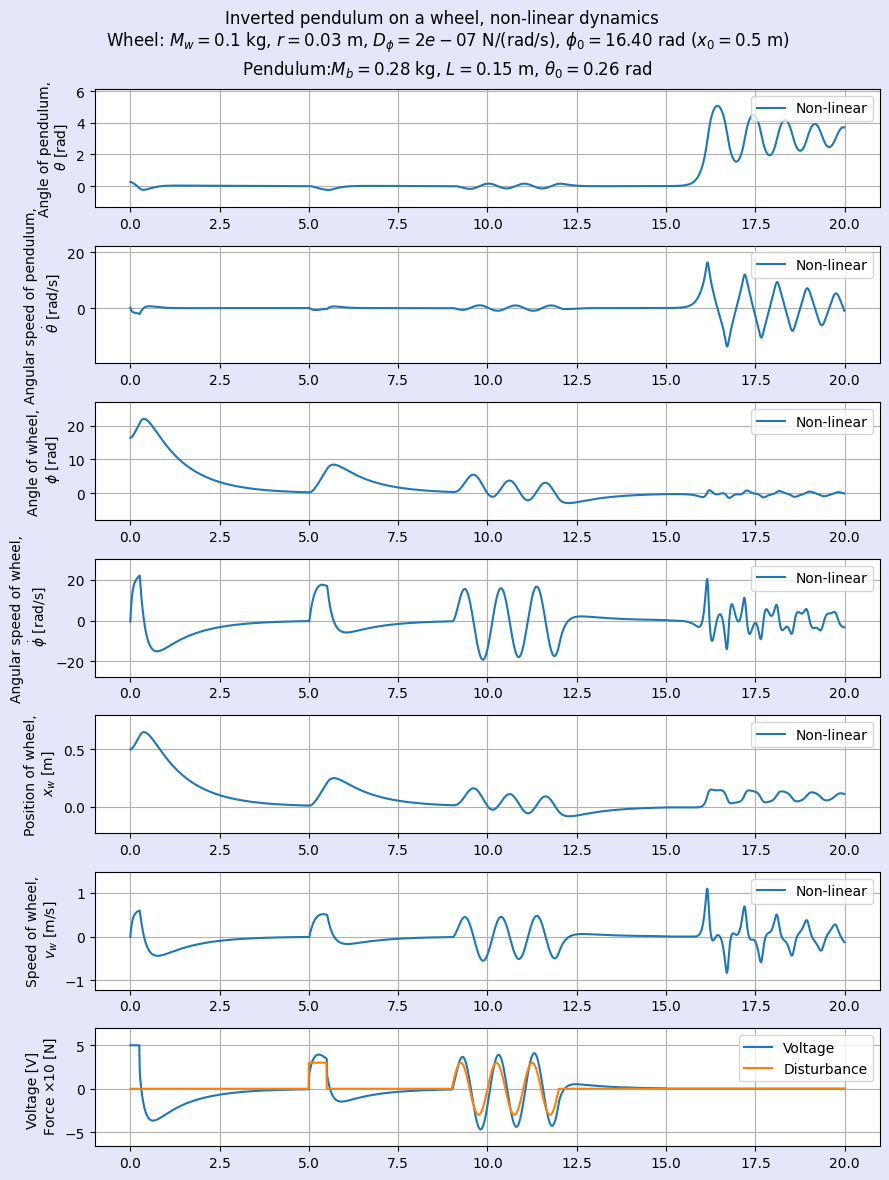

In [14]:
# グラフを描画
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"


data_list = [
    [(theta_hist, "Non-linear")],
    [(dtheta_hist, "Non-linear")],
    [(phi_hist, "Non-linear")],
    [(dphi_hist, "Non-linear")],
    [(x_hist, "Non-linear")],
    [(v_hist, "Non-linear")],
    [(voltage_hist, "Voltage"), (f_d_hist*10, "Disturbance")],
]
labels_list = [
    "Angle of pendulum,\n $\\theta$ [rad]",
    "Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]",
    "Angle of wheel,\n $\\phi$ [rad]",
    "Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]",
    "Position of wheel,\n $x_{w}$ [m]",
    "Speed of wheel,\n $v_{w}$ [m/s]",
    "Voltage [V] \n Force $ \\times 10$ [N]",
]

plot_time_domain(subtitle, t_points, data_list, labels_list)

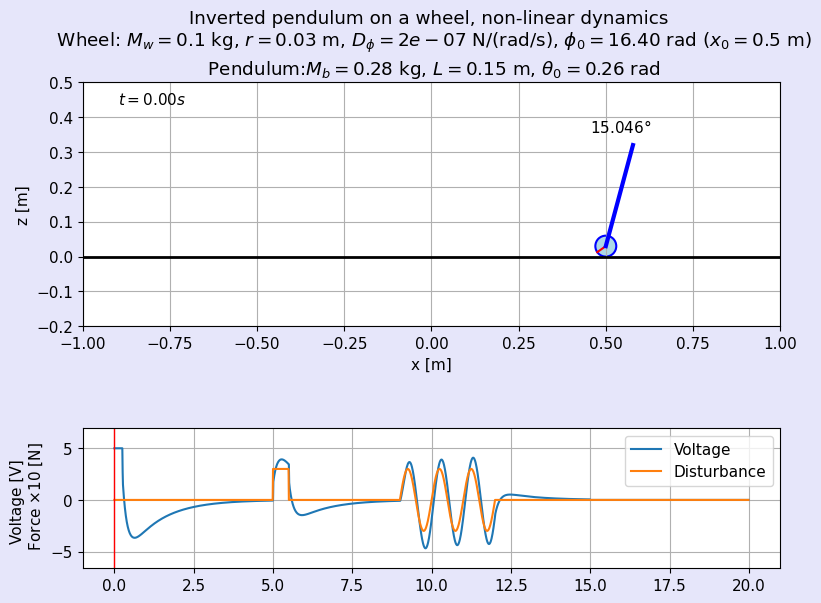

In [15]:
# アニメーションを描画

# カラーマップ
cmap = plt.get_cmap("tab10")

# プロット
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(2, 1, figsize=(9, 7),gridspec_kw={"height_ratios": [2.5, 1]})
fig.patch.set_facecolor("lavender")

ax[0].set_aspect("equal")

# グラフのプロパティの設定
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"

plot_scale = 1

set_axis_properties(ax[0],[-plot_scale, plot_scale], [-plot_scale/5, plot_scale/2], "x [m]", "z [m]", subtitle, grid=True)
configure_axes(ax[1], t_points, [(voltage_hist, "Voltage"), (f_d_hist*10, "Disturbance")], 
               "Voltage [V] \n Force $ \\times 10$ [N]", y_axis_outer=0.2, legend_loc="upper right")
# アニメーション用設定
# ax[0]
wheel, line_angle, pendulum, text_time, text_angle = initialize_pendulum_animation(ax[0])

# 外乱をアニメーションで描画
arrow_scale = plot_scale/2
arrow_disturb = ax[0].arrow(
    x_hist[0] + 2 * L * np.sin(theta_hist[0]) - arrow_scale * f_d_hist[0],
    r + 2 * L * np.cos(theta_hist[0]),
    arrow_scale * f_d_hist[0],
    0,
    length_includes_head=True,
    width=arrow_scale * 0.01,
    color=cmap(2),
    alpha=0.8,
)

# ax[1]
(line_time,) = ax[1].plot(
    [t_points[0], t_points[0]], ax[1].get_ylim(), lw=1, c="red"
)

In [16]:
# フレーム更新関数
def update_state_feedback_frame(i, wheel, line_angle, pendulum, text_angle, text_time, line_time, arrow_disturb):
   # 倒立振子のアニメーション更新
   wheel, line_angle, pendulum, text_angle, text_time = update_pendulum_frame(i, wheel, line_angle, pendulum, text_angle, text_time)
   
   # 外乱
   kwargs = {
        "x": x_hist[i] + 2 * L * np.sin(theta_hist[i]) - arrow_scale * f_d_hist[i],
        "y": r + 2 * L * np.cos(theta_hist[i]),
        "dx": arrow_scale * f_d_hist[i],
    }
   arrow_disturb.set_data(**kwargs)
   
   # タイムライン
   line_time.set_data([t_points[i], t_points[i]], ax[1].get_ylim())
   
   return (
         wheel,
         line_angle,
         pendulum,
         text_angle,
         text_time,
         line_time,
         arrow_disturb,
   )

In [17]:
# アニメーションの作成

ani = animation.FuncAnimation(
    fig,
    lambda i :update_state_feedback_frame(i, wheel, line_angle, pendulum, text_angle, text_time, line_time, arrow_disturb),
    frames=np.arange(0, len(t_points), 5),
    interval=dt * 5 * 1000,
    blit=True,
)

# アニメーションの表示
HTML(ani.to_html5_video())

In [26]:
# アニメーションの保存
file = "state_feedback_pendulum.gif"
ani.save(file)

## オブザーバの設計
実機では、車体の角速度$\dot{\theta}$（と設定によっては、車輪の角度$\phi$）しか観測できず、前述の状態フィードバックを利用することができない。
そこで、オブザーバを利用して状態推定を行い、推定した状態で状態フィードバックを行うことにする。

特に、実機は離散時間での制御となること・ノイズが乗ることを考慮し、離散時間カルマンフィルタを用いてオブザーバを設計する。

### カルマンフィルタについて
離散時間カルマンフィルタは、状態方程式
$$
\begin{aligned}
\bm{x}[k+1] &= A\bm{x}[k] + B\bm{u}[k] + D\bm{v}[k] \\
\bm{y}[k] &= C\bm{x}[k] + \bm{w}[k]
\end{aligned}
$$
に従うシステムに対して、評価関数$J=\mathbb{E}[||\bm{x}[k]-\bm{\hat{x}}[k]||_2^2]$を最小にする状態推定値$\bm{\hat{x}}[k]$を与えるフィルタである。
ここで、$v[k]$は平均0、共分散行列$V$のシステムノイズ、$w[k]$は平均0、共分散行列$W$の観測ノイズであり、システムノイズと観測ノイズは独立とする。
実際の推定手順は、状態推定値の誤差共分散行列$P[k]$として、
+ 状態の時間更新
   - 事前状態推定値$\bm{\hat{x}}[k|k-1] = A\bm{\hat{x}}[k-1|k-1] + B\bm{u}[k-1]$
   - 事前誤差共分散行列$P[k|k-1] = AP[k-1|k-1]A^\top + DVD^\top$
+ 状態の計測更新
   - カルマンゲイン$K[k] = P[k|k-1]C^\top(CP[k|k-1]C^\top + W)^{-1}$
   - 状態推定値$\bm{\hat{x}}[k|k] = \bm{\hat{x}}[k|k-1] + K[k](\bm{y}[k] - C\bm{\hat{x}}[k|k-1])$
+ 状態推定値の誤差共分散の更新
   - （事後）誤差共分散行列$P[k|k] = (I - K[k]C)P[k|k-1]$

となる。ここで、状態推定値、誤差共分散行列の初期値は問題に応じた事前知識等を利用しそれぞれ適当に設定する。

In [52]:
# カルマンフィルタ
class KalmanObserver:
   def __init__(self,A:np.ndarray,B:np.ndarray,C:np.ndarray,D:np.ndarray):
      self.A = A
      self.B = B
      self.C = C
      self.D = D
   def initialize(self,x_est_init:np.ndarray,P_init:np.ndarray,V:np.ndarray,W:np.ndarray):
      """
      カルマンフィルタの初期化

      Parameters
      ----------
      x_est_init : np.ndarray
          予測状態の初期値
      P_init : np.ndarray
          誤差共分散行列の初期値
      V : np.ndarray
          システムノイズの共分散行列
      W : np.ndarray
          観測ノイズの共分散行列
      """
      self.x_est = x_est_init
      self.x_est_hat = np.zeros_like(self.x_est)
      self.P = P_init
      self.P_hat = np.zeros_like(self.P)
      self.V = V
      self.W = W
      self.K = np.zeros((self.A.shape[0],self.C.shape[0]))
         
   
   def step(self,y:np.ndarray,u:np.ndarray)-> np.ndarray:
      """
      状態の更新

      Parameters
      ----------
      y : np.ndarray
         観測値
      u : np.ndarray
         入力

      Returns
      -------
      np.ndarray
         推定状態
      """
      
      # 状態の時間更新
      self.x_est_hat = self.A @ self.x_est + self.B @ u
      #print("x_est_hat:",self.x_est_hat)
      self.P_est_hat = self.A @ self.P @ self.A.T + self.D @ self.V @ self.D.T
      self.P_est_hat = (self.P_est_hat + self.P_est_hat.T) / 2 # 対称行列性を確保
      # 状態の観測更新
      self.K = np.linalg.solve(self.C @ self.P_est_hat @ self.C.T + self.W,self.C @ self.P_est_hat).T
      # self.K = self.P_est_hat @ self.C.T @ np.linalg.inv(self.C @ self.P_est_hat @ self.C.T + self.W)
      self.x_est = self.x_est_hat + self.K @ (y - self.C @ self.x_est_hat)
      
      # 誤差共分散の更新
      self.P = (np.eye(self.A.shape[0]) - self.K @ self.C) @ self.P_est_hat
      
      return self.x_est

### 連続時間システムから離散時間システムへの変換
前項までのシステムは連続システムであったので、離散時間カルマンフィルタを構成するためにシステムを離散時間システムに変換する。

ここでは、連続時間システムを、
$$
\begin{aligned}
\bm{\dot{x}} &= A\bm{x} + B\bm{u}  \\
\bm{y} &= C\bm{x} 
\end{aligned}
$$
とし、離散時間システムを、
$$
\begin{aligned}
\bm{x}[k+1] &= A_d\bm{x}[k] + B_d\bm{u}[k] \\
\bm{y}[k] &= C_d\bm{x}[k] 
\end{aligned}
$$
と表現する。さらに、デシタル制御の制御周期を$T$とし、$kT \le t < (k+1)T$で入力$\bm{u}(t)$が一定であるとする。

まず、状態方程式の変換を考える。状態方程式
$$
\bm{\dot{x}} = A\bm{x} + B\bm{u} \\
$$
の一般解は、
$$
\bm{x}(t) = e^{At}\bm{x}(0) + \int_{0}^{t}e^{A(t-\tau)}B\bm{u}(\tau)d\tau \\
$$
で与えられる。よって、$t=kT$とすれば、
$$
\bm{x}[k] = e^{AkT}\bm{x}[0] + \int_{0}^{kT}e^{A(kT-\tau)}B\bm{u}(\tau)d\tau \\
$$
である。上式に注意して、$t=(k+1)T$とした式を変形すると、
$$
\begin{aligned}
\bm{x}[k+1] &= e^{A(k+1)T}\bm{x}[0] + \int_{0}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}e^{AkT}\bm{x}[0] + e^{AT}\int_{0}^{kT}e^{A(kT-\tau)}B\bm{u}(\tau)d\tau + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}\left(e^{AkT}\bm{x}[0] + \int_{0}^{kT}e^{A(kT-\tau)}B\bm{u}(\tau)d\tau\right) + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}\bm{x}[k] + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}\bm{x}[k] + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}Bd\tau\cdot\bm{u}[k] \\
&= e^{AT}\bm{x}[k] + \int_{0}^{T}e^{A\sigma}Bd\sigma \cdot\bm{u}[k] \\
\end{aligned}
$$
となる。これを離散時間システムの状態方程式
$$
\bm{x}[k+1] = A_d\bm{x}[k] + B_d\bm{u}[k]
$$
と比較することで、
$$
\begin{aligned}
A_d &= e^{AT} \\
B_d &= \int_{0}^{T}e^{A\sigma}Bd\sigma  \\
\end{aligned}
$$
を得る。
次に、観測方程式の変換を考える。明らかに観測方程式は連続・離散で不変なので、$C_d = C$となる。

以上をまとめると、連続時間システムの離散時間システムへの変換式は、
$$
\begin{aligned}
A_d &= e^{AT} \\
B_d &= \int_{0}^{T}e^{A\sigma}Bd\sigma  \\
C_d &= C
\end{aligned}
$$
となる。

In [53]:
def transform_continuous_to_discrete(T:float,A:np.ndarray,B:np.ndarray,C:np.ndarray)->Tuple[np.ndarray,np.ndarray,np.ndarray]:
   """
   連続時間システムを離散時間システムに変換する関数
   
   x_dot(t) = A x(t) + B u(t)
   
   y(t) = C x(t)
   
   を
   
   x[k+1] = A_d x[k] + B_d u[k]
   
   y[k] = C_d x[k] 

   に変換
   
   Parameters
   ----------
   T : float
      制御周期
   A : np.ndarray
   B : np.ndarray
   C : np.ndarray

   Returns
   -------
   Tuple[np.ndarray,np.ndarray,np.ndarray]
       A_d,B_d,C_d
   """
   A_d = sc.linalg.expm(A*T)
   
   #　常微分方程式の数値解法を使って積分を求める
   B_d = np.zeros_like(B)
   for i in range(B.shape[1]):
      f_i = lambda t,x: A @ x + B[:,i]
      B_d[:,i]= solve_ivp(f_i,[0,T],np.zeros(B.shape[0])).y[:,-1]
   C_d = C
   
   return A_d,B_d,C_d

### 倒立振子のカルマンフィルタの作成と検証

In [64]:

# 20秒間動かすシミュレーションを実行
t_end = 15
dt = 0.01
t_points = np.arange(0, t_end, dt)

# ノイズの設定
# V = 1e-6 * np.diag([1,100,1,100])
# W = 1e0* np.diag([0.1,0.01])
V = 1e-16 * np.diag([1,100,1,100])
W = 1e-1* np.diag([0.1,0.01])


# カルマンフィルタの初期化
A_d,B_d,C_d = transform_continuous_to_discrete(dt,A,B,C)
# print("A_d:", A_d)
# print("B_d:", B_d)
# print("C_d:", C_d)

observer = KalmanObserver(A_d,B_d,C_d,np.ones((A_d.shape[0])))


#初期条件の設定：10度傾け、位置を0.5mずらした状態から開始
theta_init = np.radians(15)
x_est_init = 0.1
phi_init = x_est_init / r - theta_init
# カルマンフィルタの初期条件
sigma = 0.01
x_est_init = np.array([theta_init, phi_init, 0, 0]) + np.random.normal(0,sigma,(4,))
x_est_init = x_est_init.reshape(-1,1)
P_init = sigma**2 * np.eye(A_d.shape[0])

# 常微分方程式を解く
pendulum_simulator.reset(theta_init, phi_init,0, 0)
observer.initialize(x_est_init,P_init,V,W)
x_hist = []
x_est_hist = []
y_hist = []

for t in t_points:
   # コントローラの出力を計算
   v = voltage_control(t, observer.x_est)
   #print("x_est:", observer.x_est)
   #print("v:", v)
   x = pendulum_simulator.step(v, 0, dt)
   
   # 状態にノイズを加える
   x_noise = x + np.random.multivariate_normal(np.zeros((A_d.shape[0])),V)
   pendulum_simulator.theta = x_noise[0]
   pendulum_simulator.phi = x_noise[1]
   pendulum_simulator.dtheta = x_noise[2]
   pendulum_simulator.dphi = x_noise[3]
   
   # ノイズを加えたものを観測
   y_noise = C @ x_noise + np.random.multivariate_normal(np.zeros((C.shape[0])),W)
   y_noise = y_noise.reshape(-1,1)
   #print("y_noise:", y_noise)
   x_est = observer.step(y_noise,np.array(v).reshape(-1,1))
   
   # データを保存
   x_hist.append(x_noise) 
   y_hist.append(y_noise)
   x_est_hist.append(x_est)

x_hist = np.array(x_hist)
y_hist = np.array(y_hist)
x_est_hist = np.array(x_est_hist)


# 解いた結果を取り出す
theta_hist = x_hist[:, 0]
phi_hist = x_hist[:, 1]
dtheta_hist = x_hist[:, 2]
dphi_hist = x_hist[:, 3]

phi_obs_hist = y_hist[:, 0]
dtheta_obs_hist= y_hist[:, 1]


theta_est_hist = x_est_hist[:, 0]
phi_est_hist = x_est_hist[:, 1]
dtheta_est_hist = x_est_hist[:, 2]
dphi_est_hist = x_est_hist[:, 3]

voltage_hist = np.zeros_like(t_points)
f_d_hist  = np.zeros_like(t_points)
for i,t in enumerate(t_points):
    voltage_hist[i] = voltage_control(t, x_est_hist[i])
    f_d_hist[i] =force_disturbance(t, x_est_hist[i])

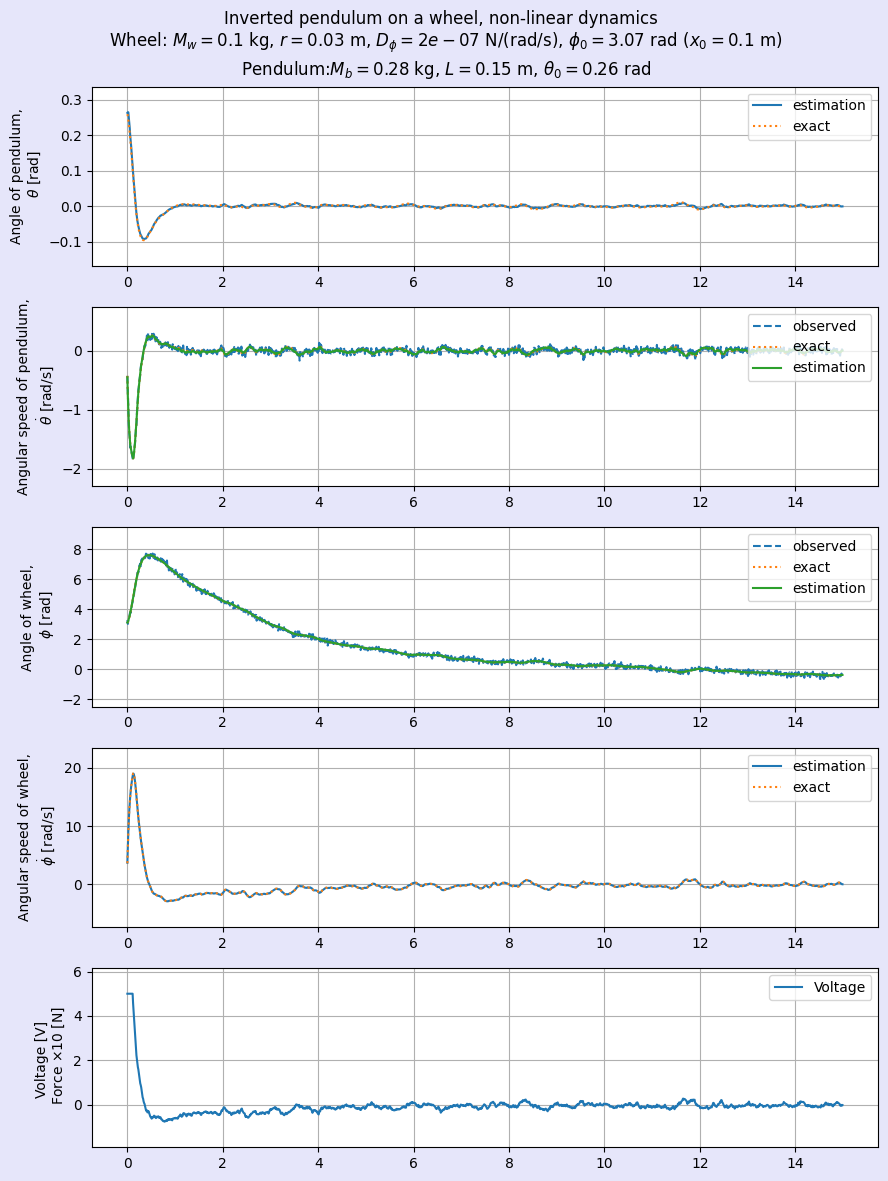

In [67]:
# グラフを描画
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"


data_list = [
    [(theta_est_hist, "estimation"), (theta_hist, "exact", {"linestyle":"dotted"})],
    [(dtheta_obs_hist, "observed",{"linestyle":"dashed"}),(dtheta_hist, "exact", {"linestyle":"dotted"}),(dtheta_est_hist, "estimation")],
    [(phi_obs_hist, "observed",{"linestyle":"dashed"}), (phi_hist, "exact", {"linestyle":"dotted"}),(phi_est_hist, "estimation")],
    [(dphi_est_hist, "estimation"), (dphi_hist, "exact", {"linestyle":"dotted"})],
    [(voltage_hist, "Voltage")]
]
labels_list = [
    "Angle of pendulum,\n $\\theta$ [rad]",
    "Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]",
    "Angle of wheel,\n $\\phi$ [rad]",
    "Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]",
    "Voltage [V] \n Force $ \\times 10$ [N]",
]

plot_time_domain(subtitle, t_points, data_list, labels_list)

In [ ]:
# アニメーションを描画

# カラーマップ
cmap = plt.get_cmap("tab10")

# プロット
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(2, 1, figsize=(9, 7),gridspec_kw={"height_ratios": [2.5, 1]})
fig.patch.set_facecolor("lavender")

ax[0].set_aspect("equal")

# グラフのプロパティの設定
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"

plot_scale = 1

set_axis_properties(ax[0],[-plot_scale, plot_scale], [-plot_scale/5, plot_scale/2], "x [m]", "z [m]", subtitle, grid=True)
configure_axes(ax[1], t_points, [(voltage_hist, "Voltage"), (f_d_hist*10, "Disturbance")], 
               "Voltage [V] \n Force $ \\times 10$ [N]", y_axis_outer=0.2, legend_loc="upper right")
# アニメーション用設定
# ax[0]
wheel, line_angle, pendulum, text_time, text_angle = initialize_pendulum_animation(ax[0])

# 外乱をアニメーションで描画
arrow_scale = plot_scale/2
arrow_disturb = ax[0].arrow(
    x_hist[0] + 2 * L * np.sin(theta_hist[0]) - arrow_scale * f_d_hist[0],
    r + 2 * L * np.cos(theta_hist[0]),
    arrow_scale * f_d_hist[0],
    0,
    length_includes_head=True,
    width=arrow_scale * 0.01,
    color=cmap(2),
    alpha=0.8,
)

# ax[1]
(line_time,) = ax[1].plot(
    [t_points[0], t_points[0]], ax[1].get_ylim(), lw=1, c="red"
)

## LQG制御器の設計

# 実機のシステム同定


# 雑記


## センサバイアスの除去
センサにバイアスがあって$\bm{y} = C \bm{x} + \bm{d}$となる場合にも、外乱オブザーバの考え方を利用することで、バイアスを除去できる場合がある。


### 理論
今回の問題に照らした例として、角速度センサに定数バイアス$\omega_b$がある場合を考える。
このときの出力方程式は、$\dot{\theta}$を$\dot{\theta} + \omega_b$に置き換えたものになる。
つまり、出力方程式は、
$$
\begin{aligned}
\bm{y} &= C\begin{bmatrix}\theta \\ \phi \\ \dot{\theta}+ \omega_b  \\ \dot{\phi} \end{bmatrix} \\
\end{aligned}
$$
となる。上の式は状態量$\bm{x}$に対して線形ではない。そこで、新たな状態量として、
$$
\begin{aligned}
\bm{x}_b &:= \bm{x} +  \begin{bmatrix}0 \\ 0 \\ \omega_b \\ 0 \end{bmatrix} 
= \begin{bmatrix} \theta \\ \phi \\ \dot{\theta} + \omega_b \\ \dot{\phi} \end{bmatrix} \\
\end{aligned}
$$
を定義する。これにより出力方程式が新たな状態量$\bm{x}_b$に対して線形になる。
状態量$\bm{x}_b$の状態方程式を導出するために、
$$
\bm{x} = \bm{x}_b -  \begin{bmatrix}0 \\ 0 \\ \omega_b \\ 0 \end{bmatrix} \\
$$
であること、$\dot{\omega}_b=0$なので、
$$
\dot{\bm{x}} = \dot{\bm{x}}_b
$$
であることを利用し、これらを元の状態空間表現に代入すると、
$$
\begin{aligned}
\dot{\bm{x}}_b &= A \left( \bm{x}_b -  \begin{bmatrix}0 \\ 0 \\ \omega_b \\ 0 \end{bmatrix} \right) -B\bm{u} \\
&= A \bm{x}_b -  \bm{a}_3 \omega_b - B \bm{u}\\
\bm{y} &= C \bm{x}_b\\
\end{aligned}
$$
となる。上は状態に関して線形ではない。そこで、さらに状態$\hat{\bm{x}}$を以下で定義した拡大系を考える。
$$
\hat{\bm{x}} := \begin{bmatrix} \bm{x}_b \\ \omega_b \end{bmatrix}
$$
すると、上の状態空間表現は、
$$
\begin{aligned}
\dot{\hat{\bm{x}}} &= \begin{bmatrix} A & -\bm{a}_3 \\ 0 & 0 \end{bmatrix} \hat{\bm{x}} + \begin{bmatrix} B \\ 0 \end{bmatrix} \bm{u} \\
\bm{y} &= \begin{bmatrix} C & 0 \end{bmatrix} \hat{\bm{x}} \\
\end{aligned}
$$
となり、状態に関して線形な状態空間表現に変形できた。

以上の拡大系に対してオブザーバを設計することで、バイアス$\omega_b$を推定できる。
そして、推定したバイアスを利用して元の状態を推定することで、バイアスを除去した状態推定・状態フィードバックが行える。
補足として、オブザーバを構成するためには拡大系が可観測である必要があるが、実際に数値計算すると可観測であることが確かめられるので、問題ない。



In [30]:
# dthetaにバイアスw_dがあるとして拡大系を構成したときに系が可観測か確認
A_extend = np.hstack([A, -A[:,None,2]])
A_extend = np.vstack([A_extend, np.array([0,0,0,0,0])])
C_extend = np.hstack([C, np.zeros((2,1))])

U_o_extend = np.vstack([C_extend, C_extend @ A_extend, C_extend @ A_extend @ A_extend, C_extend @ A_extend @ A_extend @ A_extend, C_extend @ A_extend @ A_extend @ A_extend @ A_extend])
print("rank U_o_extend:", np.linalg.matrix_rank(U_o_extend))

# 車輪の回転角度を状態空間表現から除いた場合
A_wo_phi_ext = np.hstack([A_wo_phi, -A_wo_phi[:,None,1]])
A_wo_phi_ext = np.vstack([A_wo_phi_ext, np.array([0,0,0,0])])
C_wo_phi_ext = np.hstack([C_wo_phi[1,None,:], np.zeros((1,1))])

U_o_wo_phi_ext = np.vstack([C_wo_phi_ext, C_wo_phi_ext @ A_wo_phi_ext, C_wo_phi_ext @ A_wo_phi_ext @ A_wo_phi_ext, C_wo_phi_ext @ A_wo_phi_ext @ A_wo_phi_ext @ A_wo_phi_ext])
print("rank U_o_wo_phi_ext:", np.linalg.matrix_rank(U_o_wo_phi_ext))

# print("rank(A):", np.linalg.matrix_rank(A))
# print("rank(A_wo_phi):", np.linalg.matrix_rank(A_wo_phi))

rank U_o_extend: 5
rank U_o_wo_phi_ext: 4


また、上記のバイアスに加えて、角度$\theta$が定数バイアス$\theta_d$が加わった状態で観測できる場合にも、上記と同様の手順により拡大系・オブザーバを構成できる。

In [36]:
# theta・dthetaにバイアスtheta_d, w_dがあるとして拡大系を構成したときに系が可観測か確認
A_ex = np.hstack([A,-A[:,None,0], -A[:,None,2]])
A_ex = np.vstack([A_ex, np.zeros((2,6))])
C_ex = np.vstack([np.array([[1,0,0,0]]),C])#thetaも観測できる
C_ex= np.hstack([C_ex, np.zeros((3,2))])

U_o_ex = np.vstack([C_ex, C_ex @ A_ex, C_ex @ A_ex @ A_ex, C_ex @ A_ex @ A_ex @ A_ex,C_ex @ A_ex @ A_ex @ A_ex @ A_ex,C_ex @ A_ex @ A_ex @ A_ex @ A_ex @ A_ex])
print("rank U_o_ex:", np.linalg.matrix_rank(U_o_ex))


rank U_o_ex: 6


### シミュレーション
上記の２つのバイアスを除去するシミュレーションを行う。